# NEO Data Analysis
---
In this notebook, we analyze Near-Earth Objects (NEOs) data to explore key attributes, including the estimated size, relative velocity, and miss distance of NEOs in relation to Earth. We also explore whether these NEOs are potentially hazardous and how different factors (e.g., size, velocity, and miss distance) correlate with each other. The analysis includes the following visualizations:

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from cassandrautils import getDF

# Set plot style
sns.set(style="whitegrid")

# Get the NEO data from the Cassandra table
table_name = 'neodata'
df = getDF(table_name)

df.head()

,id,close_approach_date,estimated_diameter_max_km,estimated_diameter_min_km,is_potentially_hazardous,miss_distance_km,name,orbiting_body,relative_velocity_kph
0,54499797,2024-11-25,0.060206,0.026925,False,9.598218e+06,(2024 WD),Earth,31009.415215
1,54412459,2024-11-28,0.036479,0.016314,False,4.126099e+07,(2023 XG),Earth,39378.287296
2,54220006,2024-11-29,0.093334,0.041740,False,3.890837e+07,(2021 VF19),Earth,71779.782190
3,3989253,2024-11-25,0.082421,0.036860,False,4.685806e+07,(2020 BD11),Earth,30185.956775
4,54159395,2024-11-27,0.320656,0.143402,False,2.950602e+07,(2021 LT5),Earth,66837.737354


In [2]:
df.describe(include='all')

,id,close_approach_date,estimated_diameter_max_km,estimated_diameter_min_km,is_potentially_hazardous,miss_distance_km,name,orbiting_body,relative_velocity_kph
count,90,90,90.000000,90.000000,90,9.000000e+01,90,90,90.000000
unique,90,6,NaN,NaN,2,NaN,90,1,NaN
top,54499797,2024-11-25,NaN,NaN,False,NaN,(2024 WD),Earth,NaN
freq,1,23,NaN,NaN,86,NaN,1,90,NaN
mean,NaN,NaN,0.138282,0.061842,NaN,2.390884e+07,NaN,NaN,42560.851953
std,NaN,NaN,0.215419,0.096338,NaN,1.949954e+07,NaN,NaN,20282.234861
min,NaN,NaN,0.007146,0.003196,NaN,1.135793e+05,NaN,NaN,11907.982771
25%,NaN,NaN,0.021313,0.009531,NaN,6.489633e+06,NaN,NaN,28226.071859
50%,NaN,NaN,0.047939,0.021439,NaN,1.943152e+07,NaN,NaN,38986.569004
75%,NaN,NaN,0.141937,0.063476,NaN,3.850493e+07,NaN,NaN,56134.967778


### Interpretation of the Descriptive Statistics for NEO Data

The summary statistics for the NEO dataset provide insights into the key attributes:

- **`id`**: There are 90 unique NEO records, each identified by a unique `id`. The most frequent `id` is `54499797`, but all others are distinct.
  
- **`close_approach_date`**: The close approach dates range from 2024-11-25 to other dates, with the most frequent date being `2024-11-25`, which appears 23 times.

- **`estimated_diameter_max_km` and `estimated_diameter_min_km`**: The maximum and minimum estimated diameters of NEOs vary significantly, with the maximum diameter ranging from a minimum of `0.007 km` to a maximum of `1.288 km`, and the minimum diameter ranging from `0.003 km` to `0.576 km`. The average maximum diameter is about `0.138 km`, while the average minimum diameter is about `0.061 km`.

- **`is_potentially_hazardous`**: This boolean column indicates whether a NEO is potentially hazardous. Out of the 90 records, 86 NEOs are not considered hazardous (`False`), and only 4 NEOs are marked as potentially hazardous (`True`).

- **`miss_distance_km`**: The closest NEOs to Earth range from a minimum miss distance of `113,579 km` to a maximum of `73,299,510 km`, with an average miss distance of approximately `23.9 million km`.

- **`name`**: The dataset includes 90 unique NEO names, with no specific patterns or repeated names.

- **`orbiting_body`**: All NEOs in this dataset are orbiting Earth, as indicated by the `orbiting_body` column.

- **`relative_velocity_kph`**: The relative velocity of NEOs ranges from a minimum of `11,908 km/h` to a maximum of `103,529 km/h`, with a mean velocity of approximately `42,561 km/h`. The velocities show a broad range, with most NEOs having velocities between `28,226 km/h` and `56,135 km/h`.

These statistics highlight the variation in NEO sizes, velocities, miss distances, and the relatively low number of potentially hazardous objects.


## 1. Distribution of NEO Estimated Diameters
We start by visualizing the distribution of NEO sizes, both the minimum and maximum estimated diameters. The histograms with Kernel Density Estimation (KDE) overlays show the frequency of NEO diameters and provide insights into the typical sizes of NEOs, including their spread from smaller to larger objects.

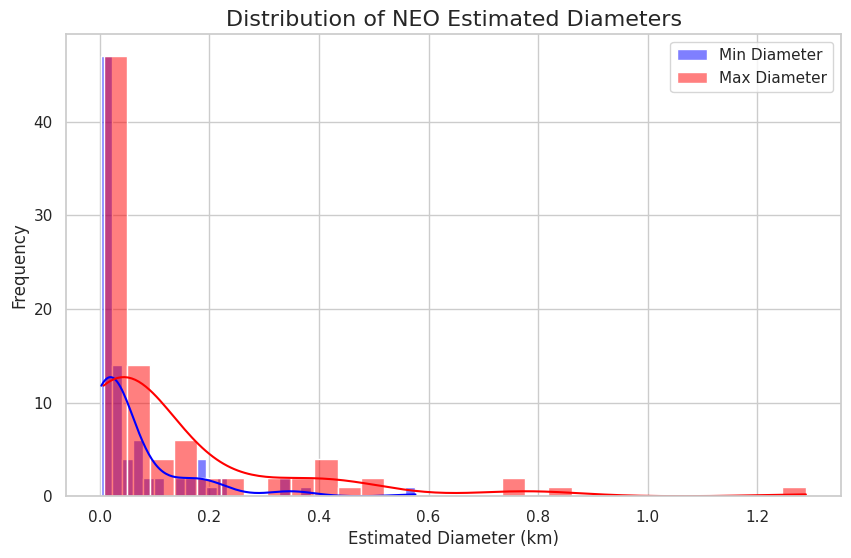

In [3]:
# Plotting the distribution of NEO sizes (min and max estimated diameters)
plt.figure(figsize=(10, 6))

# Plot the minimum estimated diameters
sns.histplot(df['estimated_diameter_min_km'], kde=True, color='blue', label='Min Diameter', bins=30)

# Plot the maximum estimated diameters
sns.histplot(df['estimated_diameter_max_km'], kde=True, color='red', label='Max Diameter', bins=30)

# Customize the plot
plt.title('Distribution of NEO Estimated Diameters', fontsize=16)
plt.xlabel('Estimated Diameter (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


#### 2. Distribution of NEO Velocities
This section focuses on the distribution of NEO velocities (`relative_velocity_kph`). The histogram with KDE gives us an understanding of how fast NEOs are traveling in space, with most NEOs showing velocities within a specific range.

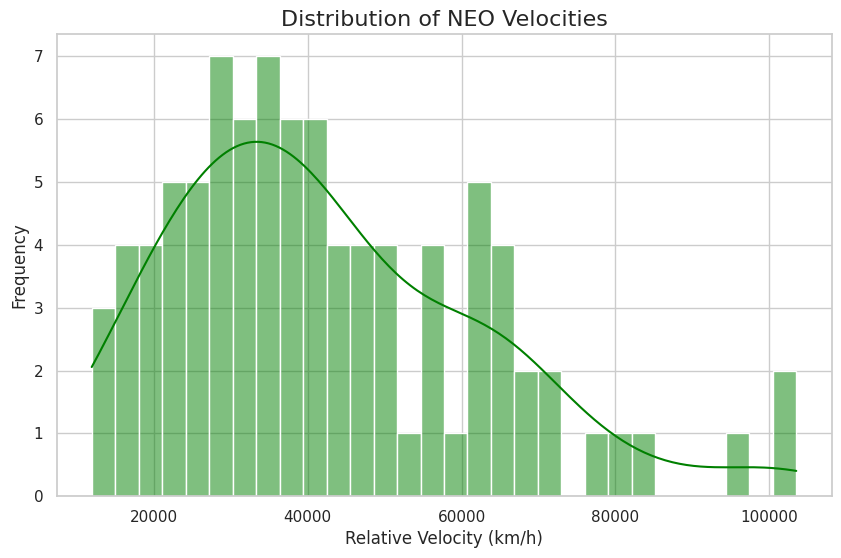

In [4]:
# Plotting the distribution of NEO velocities (relative_velocity_kph)
plt.figure(figsize=(10, 6))

# Plot the velocity distribution
sns.histplot(df['relative_velocity_kph'], kde=True, color='green', bins=30)

# Customize the plot
plt.title('Distribution of NEO Velocities', fontsize=16)
plt.xlabel('Relative Velocity (km/h)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


#### 3. Distribution of NEO Miss Distances from Earth
We examine how close NEOs get to Earth by plotting the distribution of miss distances (`miss_distance_km`). The plot shows the frequency of different miss distances, with a focus on how far NEOs pass from Earth during their closest approach.

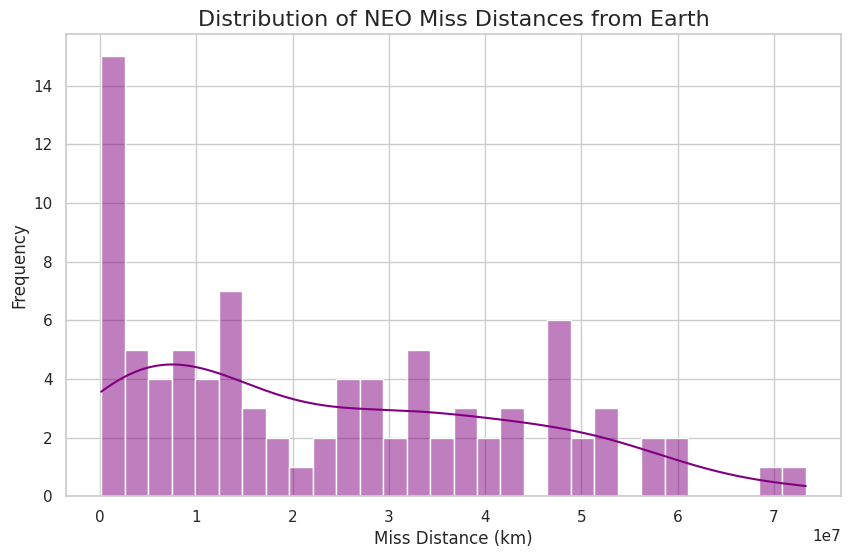

In [5]:
# Plotting the distribution of NEO miss distances (miss_distance_km)
plt.figure(figsize=(10, 6))

# Plot the miss distance distribution
sns.histplot(df['miss_distance_km'], kde=True, color='purple', bins=30)

# Customize the plot
plt.title('Distribution of NEO Miss Distances from Earth', fontsize=16)
plt.xlabel('Miss Distance (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


#### 4. NEO Size vs. Velocity
We explore the relationship between the size of NEOs (minimum estimated diameter) and their relative velocities. The scatter plot reveals whether there is any noticeable pattern between these two attributes, such as whether larger NEOs tend to travel faster or slower.



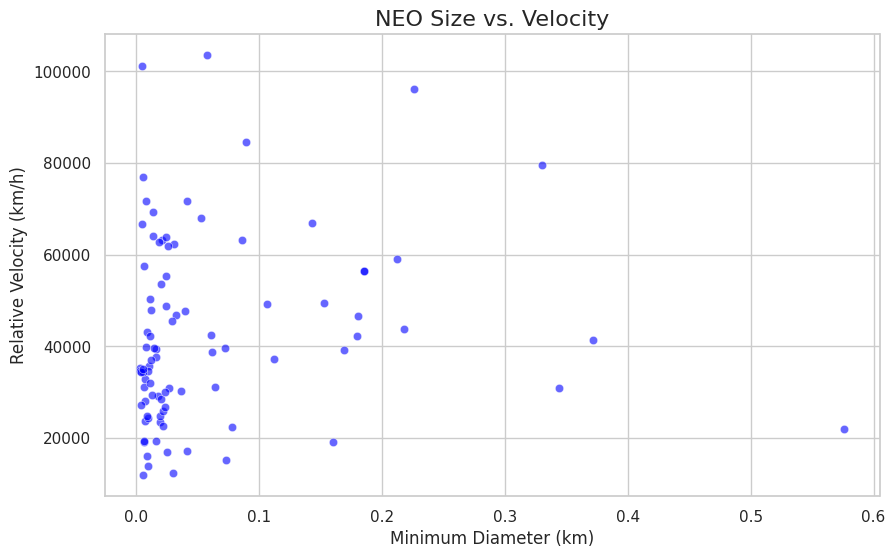

In [6]:
# Plotting NEO size vs. velocity
plt.figure(figsize=(10, 6))

# Scatter plot for min diameter vs. velocity
sns.scatterplot(x='estimated_diameter_min_km', y='relative_velocity_kph', data=df, color='blue', alpha=0.6)

# Customize the plot
plt.title('NEO Size vs. Velocity', fontsize=16)
plt.xlabel('Minimum Diameter (km)', fontsize=12)
plt.ylabel('Relative Velocity (km/h)', fontsize=12)
plt.show()


#### 5. NEO Velocity vs. Miss Distance (Potentially Hazardous NEOs)
We investigate how NEO velocity correlates with miss distance, with a focus on whether potentially hazardous NEOs exhibit different patterns. This scatter plot uses color encoding to distinguish between hazardous and non-hazardous NEOs, providing insights into how dangerous NEOs behave in terms of speed and proximity.



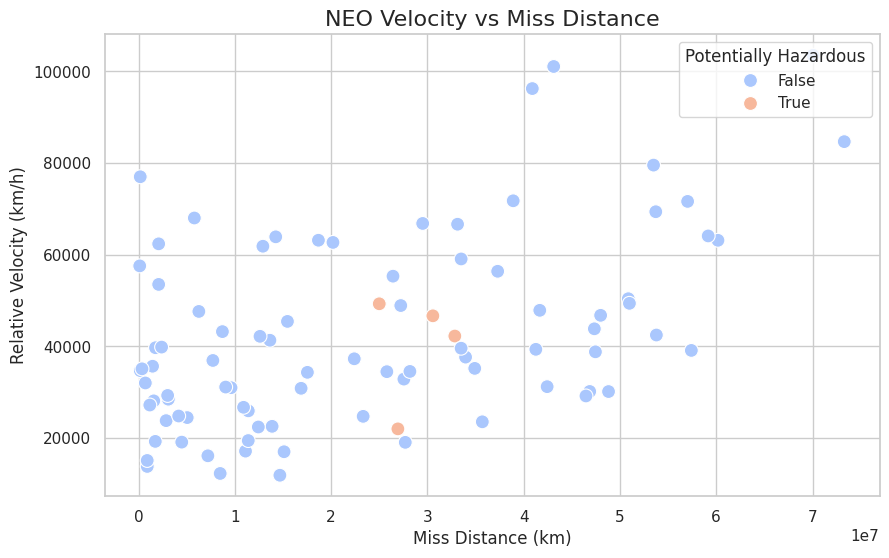

In [7]:
# 2. Scatter plot for NEO velocity vs miss distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miss_distance_km', y='relative_velocity_kph', data=df, hue='is_potentially_hazardous', palette='coolwarm', s=100)
plt.title('NEO Velocity vs Miss Distance', fontsize=16)
plt.xlabel('Miss Distance (km)', fontsize=12)
plt.ylabel('Relative Velocity (km/h)', fontsize=12)
plt.legend(title='Potentially Hazardous', loc='upper right')
plt.show()

#### 6. Number of Potentially Hazardous NEOs
This bar plot visualizes the count of potentially hazardous NEOs, categorized by whether they are considered hazardous or not. It helps us understand the proportion of NEOs that pose a potential risk to Earth.

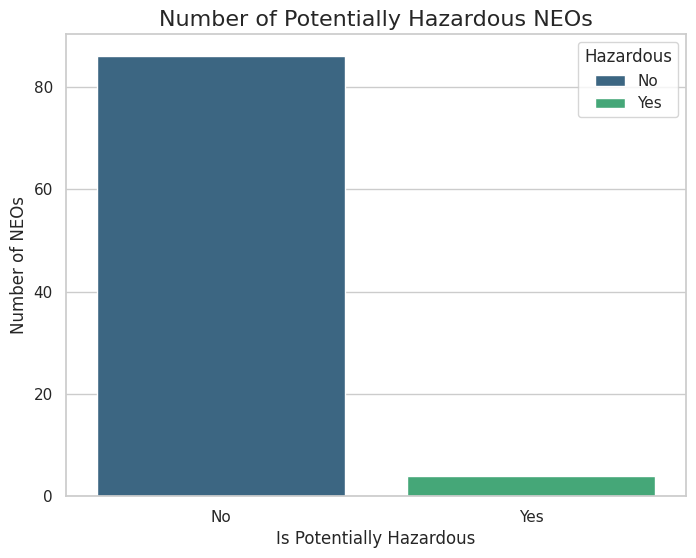

In [8]:
# Plotting the number of potentially hazardous NEOs
plt.figure(figsize=(8, 6))

# Use 'hue' for coloring the bars by 'is_potentially_hazardous'
sns.countplot(x='is_potentially_hazardous', data=df, palette='viridis', hue='is_potentially_hazardous')

# Customize the plot
plt.title('Number of Potentially Hazardous NEOs', fontsize=16)
plt.xlabel('Is Potentially Hazardous', fontsize=12)
plt.ylabel('Number of NEOs', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Hazardous', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### 7. Top 10 Closest NEOs by Miss Distance
In this section, we sort the NEOs by their closest approach to Earth, displaying the top 10 NEOs with the smallest miss distances. This plot helps identify the NEOs that came closest to Earth during the observation period, shedding light on the potential risk posed by these objects.

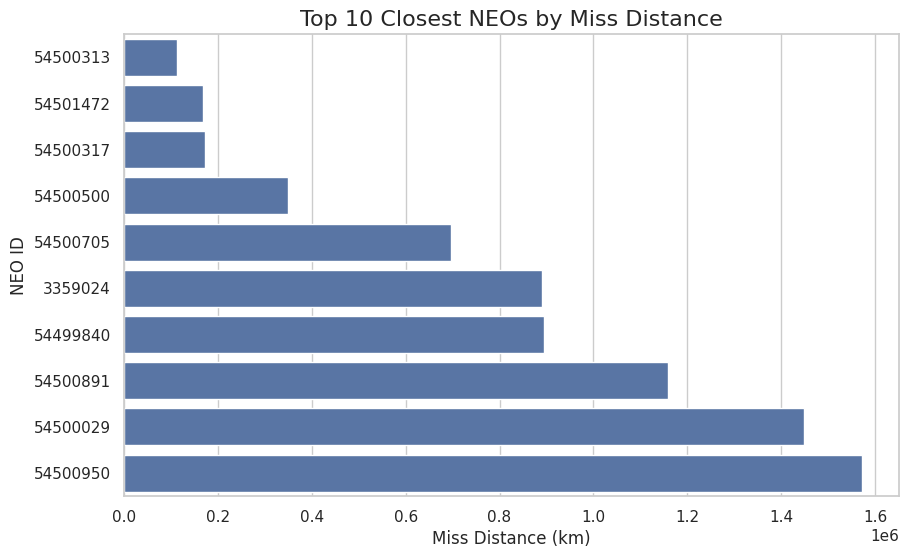

In [9]:
# Sort the data by the closest NEOs (smallest miss distance)
top_10_closest = df[['id', 'miss_distance_km']].sort_values(by='miss_distance_km').head(10)

# Plotting the top 10 closest NEOs by miss distance
plt.figure(figsize=(10, 6))
sns.barplot(x='miss_distance_km', y='id', data=top_10_closest)

# Customize the plot
plt.title('Top 10 Closest NEOs by Miss Distance', fontsize=16)
plt.xlabel('Miss Distance (km)', fontsize=12)
plt.ylabel('NEO ID', fontsize=12)

# Display the plot without legend
plt.show()
